# Day 5  | First week task

Lets put our knowledge into action by tackling following tasks: 


- Load time lapse fluorescence data from Matlab file "task1.mat" that is in the main course folder. Data are stored in two matrices: *x_norm* contains trajectories and *t* is a time vector

- Plot (with labels) example cell tracetories | Tip: transpose the loaded data to get first dimension the same

- Find peaks in each trajectories usin scipy library functions | Tip: Search for suitable functions in scipy manual

- Calculate amplitude and period of oscillations | Tip: the period of oscillation is a distance between peaks in a single cell trajectory

- Draw histograms of period distribution

- Plot amplitude vs period with labels 

- Select ten cell trajectiories with the smallest periods and plot those as a heat map 

- Perform frequency analysis using FFT Fourier transformation and identify a dominant frequency in the signal


# Task 1: Load time lapse fluorescence data from Matlab file "task1.mat" that is in the main course folder. Data are stored in two matrices: x_norm contains trajectories and t is a time vector

In [2]:
#import necessary tools, please add yourself here whatever you think you might need to solve the task

#basics
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plotter
from scipy.fftpack import fft
from scipy.signal import find_peaks


data = sio.loadmat('./task1.mat')

x = np.transpose(data['x_norm'])
time = np.transpose(data['t'])
x.shape



(101, 501)

# Task 2: Plot (with labels) example cell tracetories | Tip: transpose the loaded data to get first dimension the same

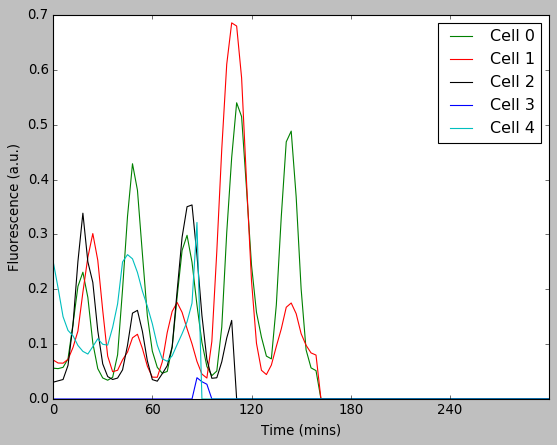

In [148]:
indices = np.random.choice(x.shape[1], 5, replace=False) # Choose five trajectories at random.

color_list = ['-r', '-k', '-b', '-c', '-g'] 
for i in range(0,5):
    plotter.plot(time, x[:,indices[i]], color_list[i - 1], label = "Cell {}".format(str(i)))

plotter.xticks(range(0, 300, 60))
plotter.xlabel('Time (mins)')  
plotter.ylabel('Fluorescence (a.u.)')  
plotter.legend();



# Task 3: Find peaks in each trajectories usin scipy library functions | Tip: Search for suitable functions in scipy manual

In [149]:
from scipy.signal import find_peaks

peak = []

for i in range (0,501):
    d = x[:,i]
    peaks, _ = find_peaks(d, height =0)
    peak.append(peaks)
    
peak

[array([ 3,  8, 14, 27, 33]),
 array([ 6, 17, 27, 37, 44]),
 array([ 7, 17, 26, 36, 47, 57]),
 array([28]),
 array([], dtype=int64),
 array([ 1,  6, 15, 17, 19, 27]),
 array([28]),
 array([ 2,  8, 13, 15, 22, 27]),
 array([ 6, 16, 27, 37, 48]),
 array([ 9, 16, 29, 34]),
 array([28, 36]),
 array([29]),
 array([28]),
 array([ 8, 16, 26]),
 array([ 6, 16, 27]),
 array([ 1,  8, 19, 25, 29]),
 array([ 8, 16, 26]),
 array([ 6, 16, 28, 37, 46]),
 array([ 6, 17, 28, 38, 44]),
 array([ 6, 17, 27]),
 array([ 1,  8, 19, 30]),
 array([ 8, 17, 28, 35]),
 array([], dtype=int64),
 array([14, 16, 23]),
 array([ 6, 17, 27, 38, 45]),
 array([ 9, 17, 23, 28]),
 array([ 5,  7, 17, 28, 38]),
 array([ 8, 16, 20, 26, 34]),
 array([ 1,  7, 17, 25]),
 array([ 3,  8, 15, 26]),
 array([28, 36]),
 array([ 3, 15, 26, 29]),
 array([ 1,  8, 18, 29]),
 array([ 5,  7, 17, 29]),
 array([ 8, 17, 28]),
 array([], dtype=int64),
 array([ 2,  7, 16, 25, 36, 43]),
 array([ 3, 15, 28]),
 array([ 9, 15, 29]),
 array([], dtype=

# Task 4: Calculate amplitude and period of oscillations | Tip: the period of oscillation is a distance between peaks in a single cell trajectory

In [150]:
amplitude=np.zeros(501)

for i in range (0,501):
    d = x[:,i]
    amplitude[i]=np.mean(d[peaks])
    amplitude = np.nan_to_num(amplitude)# Transform NAN to 0.
    
amplitude

array([0.16920959, 0.20405926, 0.16646263, 0.        , 0.        ,
       0.08907631, 0.        , 0.08528161, 0.23911045, 0.14156904,
       0.06113979, 0.        , 0.        , 0.09263394, 0.13012918,
       0.09026051, 0.09263394, 0.19452102, 0.19514065, 0.10645535,
       0.127117  , 0.10129581, 0.        , 0.10584283, 0.21245776,
       0.11278068, 0.20806692, 0.08492728, 0.07790622, 0.15351001,
       0.0615253 , 0.20598201, 0.15183459, 0.12805158, 0.10168875,
       0.        , 0.0885963 , 0.27195753, 0.10143777, 0.        ,
       0.08907631, 0.23633522, 0.19602929, 0.21047002, 0.        ,
       0.06459812, 0.09263394, 0.16291362, 0.2456517 , 0.18823888,
       0.0754685 , 0.06459812, 0.08907631, 0.11278068, 0.18943523,
       0.13948625, 0.09263394, 0.11108859, 0.0840811 , 0.        ,
       0.08183164, 0.16672672, 0.18652158, 0.08412712, 0.        ,
       0.        , 0.05841116, 0.20681346, 0.14636946, 0.09263394,
       0.25325883, 0.09845295, 0.1415927 , 0.14102899, 0.19610

In [151]:
period=[]

for i in range (0,501):
    difvector=[]
    for j in range(len(peak[i])-1): # Calculate periods with a loop as the differences.
        dif = (peak[i][j+1]-peak[i][j])
        difvector.append(dif)
    period.append(np.mean(difvector))

periodtime = np.array(period) 
periodtime = np.nan_to_num(periodtime) # Transform NAN to 0.
periodtime

/home/osboxes/Anaconda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/osboxes/Anaconda/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


array([ 7.5       ,  9.5       , 10.        ,  0.        ,  0.        ,
        5.2       ,  0.        ,  5.        , 10.5       ,  8.33333333,
        8.        ,  0.        ,  0.        ,  9.        , 10.5       ,
        7.        ,  9.        , 10.        ,  9.5       , 10.5       ,
        9.66666667,  9.        ,  0.        ,  4.5       ,  9.75      ,
        6.33333333,  8.25      ,  6.5       ,  8.        ,  7.66666667,
        8.        ,  8.66666667,  9.33333333,  8.        , 10.        ,
        0.        ,  8.2       , 12.5       , 10.        ,  0.        ,
        5.2       , 12.        , 11.5       , 13.        ,  0.        ,
        8.        ,  9.        ,  8.42857143,  8.71428571,  9.5       ,
        8.33333333,  8.        ,  5.2       ,  6.66666667,  6.75      ,
       10.        ,  9.        , 10.        , 10.5       ,  0.        ,
        6.        ,  9.        , 13.        , 10.        ,  0.        ,
        0.        ,  9.        , 10.66666667,  9.33333333,  8.66

# Task 5: Draw histograms of period distribution

Text(0.5, 1.0, 'HISTOGRAM OF PERIOD DISTRIBUTION')

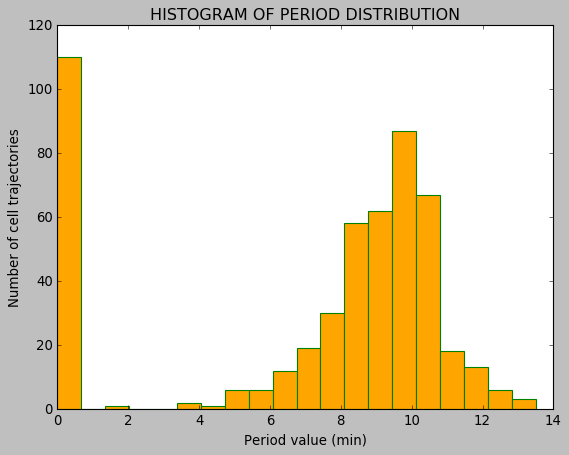

In [152]:
plotter.hist(periodtime, bins=20, alpha=1, histtype='bar', color='orange', edgecolor='g')
plotter.xlabel('Period value (min)')
plotter.ylabel('Number of cell trajectories')
plotter.title('HISTOGRAM OF PERIOD DISTRIBUTION')

# Task 6: Plot amplitude vs period with labels

Text(0.5, 1.0, 'Amplitude vs. Period')

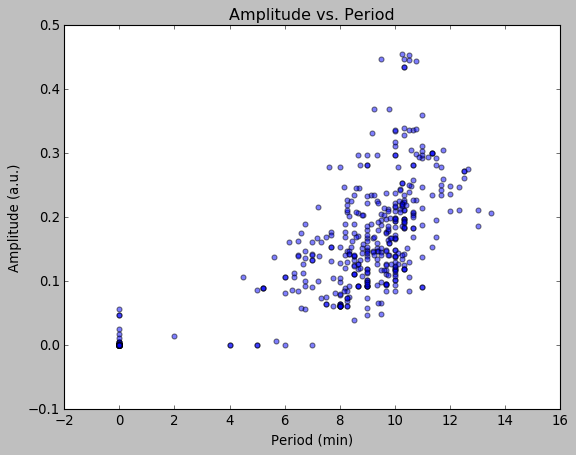

In [153]:
from sklearn.datasets import load_iris
iris = load_iris()

plotter.scatter(periodtime, amplitude, alpha=0.5, cmap='viridis') 
plotter.xlabel("Period (min)")
plotter.ylabel("Amplitude (a.u.)")
plotter.title('Amplitude vs. Period')

# Task 7: Select ten cell trajectiories with the smallest periods and plot those as a heat map 

/home/osboxes/Anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


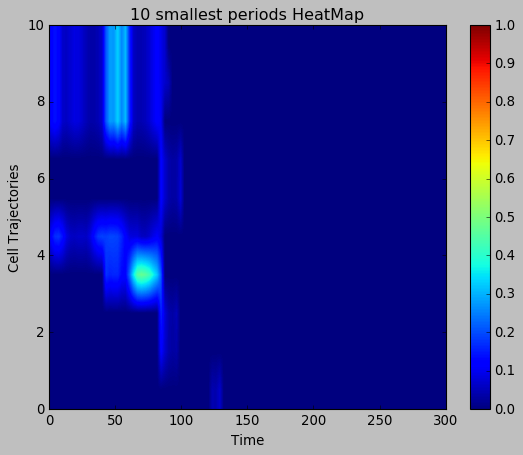

In [154]:
# Look for the 10 highest frequencies = 10 smallest periods.

freq = 1/periodtime # Some results are divided by zero, ¡INFINITES!. Must be changed.

import pandas as pd
pd.options.mode.use_inf_as_na = True
df = pd.DataFrame(data=freq)
df.fillna(df.min(),inplace=True)

### freq ### Once the infinites changed (lowest frequency value).
         ### It is possible to search for the 10 maximum frequency values.

    
import heapq
Highfreq = heapq.nlargest(10, freq) # Ten greatest values

#Now we have to retrieve the indexes of these 10 values:
list = heapq.nlargest(10, range(len(freq)), freq.take) 

ten_highest = np.zeros(10) 
ten_trajectories = []

for ind in list:
    ten_highest[list.index(ind)] = freq[ind] 
    ten_trajectories.append(x[:,ind]) # Selecting the ten cell trajectories of interest.
# print(ten_highest)  # Array with the 10 highest frequency values = 10 lowest period values


# Finally, the Heat Map
fig = plotter.figure()
plotter.style.use('classic')
plotter.imshow(ten_trajectories, extent=[0,300,0,10], aspect='auto',origin='lower', cmap="jet")
plotter.xlabel('Time')
plotter.ylabel('Cell Trajectories')
plotter.title('10 smallest periods HeatMap')
plotter.colorbar()
plotter.clim(0,1)

# Task 8: Perform frequency analysis using FFT Fourier transformation and identify a dominant frequency in the signal

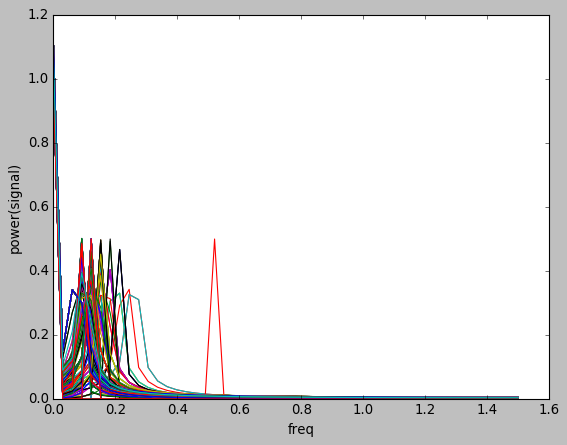

In [157]:
from scipy import fftpack

N=101
T = 1.0/3.0
x2 = np.linspace(0.0, N*T, N)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
plotter.xlabel('freq')
plotter.ylabel('power(signal)')


list_power_peaks = []
freq_peak = np.zeros(xf.size//2)

for i in range (0,501):
    F = freq[i]
    y = 0.5*(1+np.sin(F * 2.0*np.pi*x2))
    yf = fft(y)
    plotter.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
    